In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
data=pd.read_csv('C:/Users/KIMYEONKYOUNG/Desktop/code/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv')

In [3]:
data.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [4]:
split_fraction = 0.715
train_split = int(split_fraction * int(data.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

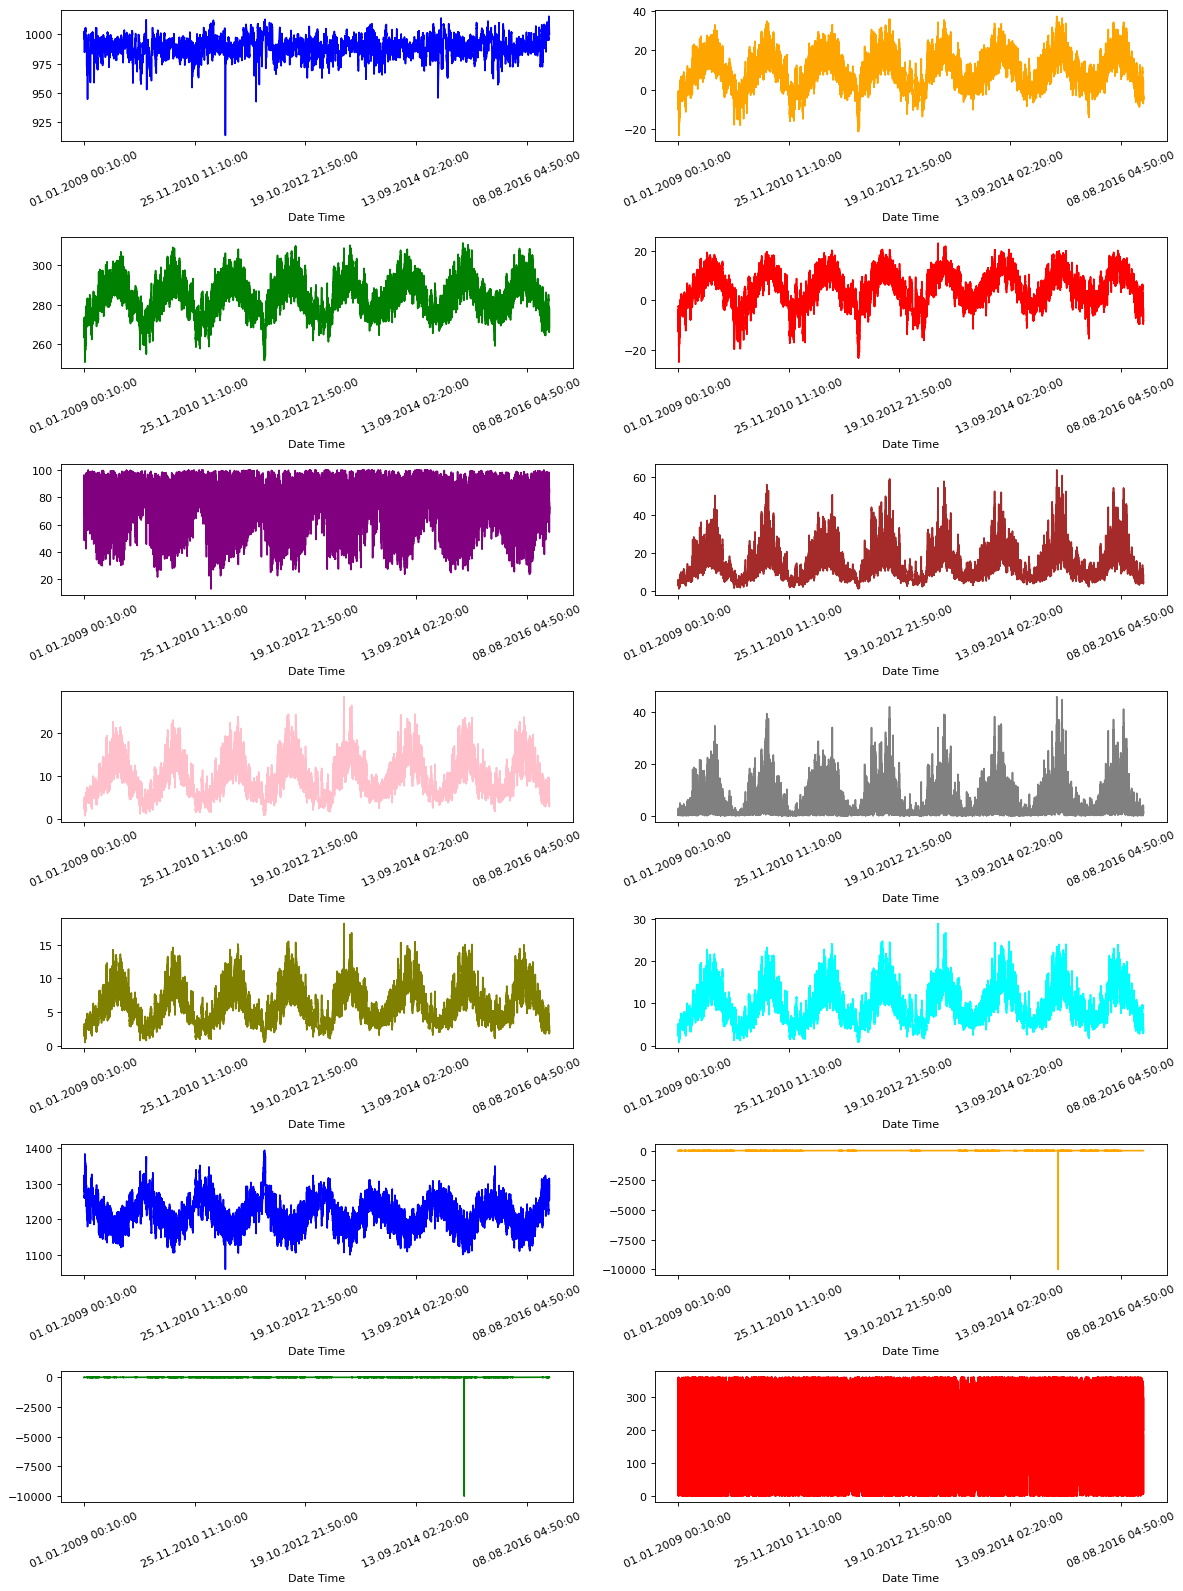

In [5]:
# titles = [
#     "Pressure",
#     "Temperature",
#     "Temperature in Kelvin",
#     "Temperature (dew point)",
#     "Relative Humidity",
#     "Saturation vapor pressure",
#     "Vapor pressure",
#     "Vapor pressure deficit",
#     "Specific humidity",
#     "Water vapor concentration",
#     "Airtight",
#     "Wind speed",
#     "Maximum wind speed",
#     "Wind direction in degrees",
# ]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            #title="{} - {}".format(titles[i], key),
            rot=25,
        )
        #ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(data)


In [6]:
#feature selection
print(
    "The selected parameters are:",
    ", ".join([feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = data[selected_features]
features.index = data[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: p (mbar), T (degC), VPmax (mbar), VPdef (mbar), sh (g/kg), rho (g/m**3), wv (m/s)


In [7]:
features

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944
...,...,...,...,...,...,...,...
420546,1.386902,-1.540264,-1.164797,-0.580316,-1.456301,1.876123,-0.968745
420547,1.369887,-1.459199,-1.132237,-0.534520,-1.452583,1.789472,-0.660963
420548,1.356518,-1.437195,-1.123121,-0.511622,-1.460020,1.763770,-0.700254
420549,1.355303,-1.561109,-1.172611,-0.571990,-1.482333,1.890320,-0.431764


In [8]:
train_data  #0~300692 ,300693 rows × 7 columns

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944
...,...,...,...,...,...,...,...
300688,-0.104339,0.853478,0.713250,-0.116113,1.429472,-0.878353,-0.890162
300689,-0.101908,0.881272,0.752322,-0.024521,1.392285,-0.900138,-0.477604
300690,-0.111631,0.902117,0.780974,0.021274,1.392285,-0.920454,-0.791934
300691,-0.117708,0.896327,0.771857,0.012948,1.388566,-0.916538,-0.791934


In [9]:
val_data #119858 rows × 7 columns

,0,1,2,3,4,5,6
300693,-0.109200,0.855794,0.717157,-0.072399,1.384847,-0.879577,-0.942551
300694,-0.110416,0.852320,0.711948,-0.078644,1.381128,-0.876639,-1.302721
300695,-0.107985,0.788626,0.627292,-0.205623,1.373691,-0.820830,-1.197944
300696,-0.109200,0.734196,0.556963,-0.305541,1.358816,-0.773343,-1.217590
300697,-0.109200,0.679767,0.487936,-0.386725,1.325347,-0.724388,-0.667512
...,...,...,...,...,...,...,...
420546,1.386902,-1.540264,-1.164797,-0.580316,-1.456301,1.876123,-0.968745
420547,1.369887,-1.459199,-1.132237,-0.534520,-1.452583,1.789472,-0.660963
420548,1.356518,-1.437195,-1.123121,-0.511622,-1.460020,1.763770,-0.700254
420549,1.355303,-1.561109,-1.172611,-0.571990,-1.482333,1.890320,-0.431764


In [10]:
# training dataset
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]   # T (degC)

sequence_length = int(past / step)

In [11]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length, #120(앞 120개까지 학습)
    sampling_rate=step, #6
    batch_size=batch_size, #256
)

In [12]:
dataset_train

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [13]:
#vaildation dataset
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [14]:
#training(single step)
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])) #
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5120      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [15]:
dataset_train

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [16]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - 223s 187ms/step - loss: 0.3737 - val_loss: 0.1482

Epoch 00001: val_loss improved from inf to 0.14817, saving model to model_checkpoint.h5
Epoch 2/10
1172/1172 [==============================] - 193s 165ms/step - loss: 0.1410 - val_loss: 0.1434

Epoch 00002: val_loss improved from 0.14817 to 0.14342, saving model to model_checkpoint.h5
Epoch 3/10
1172/1172 [==============================] - 190s 162ms/step - loss: 0.1241 - val_loss: 0.1446

Epoch 00003: val_loss did not improve from 0.14342
Epoch 4/10
1172/1172 [==============================] - 200s 170ms/step - loss: 0.1223 - val_loss: 0.1356

Epoch 00004: val_loss improved from 0.14342 to 0.13563, saving model to model_checkpoint.h5
Epoch 5/10
1172/1172 [==============================] - 216s 185ms/step - loss: 0.1167 - val_loss: 0.1377

Epoch 00005: val_loss did not improve from 0.13563
Epoch 6/10
1172/1172 [==============================] - 209s 178ms/step - loss: 0.1147 - va

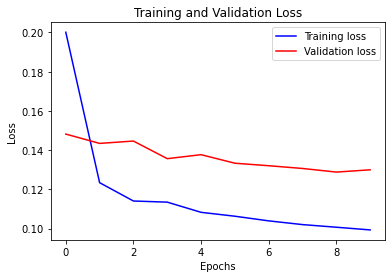

In [17]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

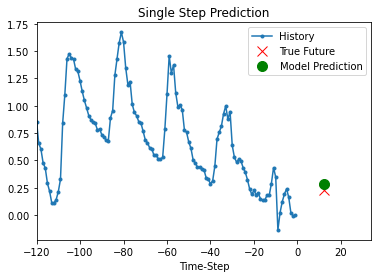

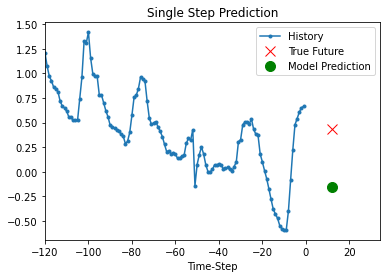

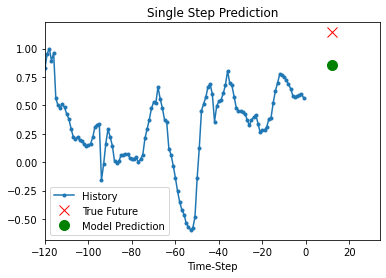

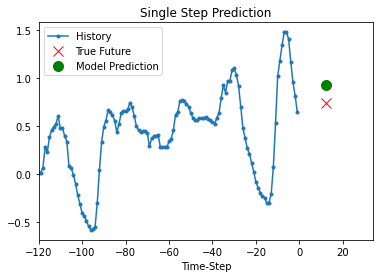

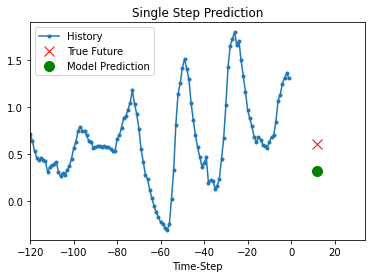

In [18]:
#prediction(single step)
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

Multi step model

In [19]:
#training(multi step)
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])) #
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(16)(lstm_out)

multi_model = keras.Model(inputs=inputs, outputs=outputs)
multi_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
multi_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                5120      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
Total params: 5,648
Trainable params: 5,648
Non-trainable params: 0
_________________________________________________________________


In [20]:
dataset_val

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [ ]:
path_checkpoint = "multi_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

multi_history = multi_model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,# multi로 고쳐줘야함
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - 221s 185ms/step - loss: 0.4725 - val_loss: 0.1578

Epoch 00001: val_loss improved from inf to 0.15783, saving model to multi_model_checkpoint.h5
Epoch 2/10
1172/1172 [==============================] - 220s 188ms/step - loss: 0.1504 - val_loss: 0.1359

Epoch 00002: val_loss improved from 0.15783 to 0.13595, saving model to multi_model_checkpoint.h5
Epoch 3/10
 725/1172 [=================>............] - ETA: 1:11 - loss: 0.1330

In [ ]:
visualize_loss(multi_history, "Multi_Training and Validation Loss")

In [ ]:
# Function that plot multi-step Model
def create_time_steps(length):
    return list(range(-length, 0))
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
multi_model.predict(x)

In [ ]:
#prediction
for x, y in dataset_val.take(3):
    multi_step_plot(x[0], y[0], multi_model.predict(x))

##########################tutorial 2(https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(22)/)

In [ ]:
df=pd.read_csv('C:/Users/KIMYEONKYOUNG/Desktop/code/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv')

In [ ]:
df.columns

In [ ]:
# Function for datasets as you want that has univariate_data(시간 정보만으로 예측)
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Train: x ~ y, x-y = history_size
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        # Label: y + target_size
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)


# HyperParameter Setting
TRAIN_SPLIT = 300000
# Random Seed Setting
tf.random.set_seed(13)

uni_data = df['T (degC)']
uni_data.index = df['Date Time']

# Check the univariate
uni_data.head()

# Visualization the univariate
uni_data.plot(subplots=True)

uni_data = uni_data.values

# Z-Normalization
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

# Use Customizing Function
univariate_past_history = 20
univariate_future_target = 0

x_train_uni,y_train_uni = univariate_data(uni_data,0,TRAIN_SPLIT,
                                         univariate_past_history,
                                         univariate_future_target)

x_val_uni,y_val_uni = univariate_data(uni_data,TRAIN_SPLIT,None,
                                     univariate_past_history,
                                     univariate_future_target)

# Check the Data
print('Single window of past history')
print(x_train_uni[0])
print('Target temperature to predict')
print(y_train_uni[0])

In [ ]:
# Input Time Range
def create_time_steps(length):
    return list(range(-length, 0))

# Visualization the Predict
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

# Check the Visualization the Predict
def baseline(history):
    return np.mean(history)

show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [ ]:
# Hyperparameter Setting
BATCH_SIZE = 256
BUFFER_SIZE = 10000

# Dataset -> Tensor
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = trin_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

# Build Simple LSTM Model
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

# Train the Model
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, 
                      validation_steps=50,
                     verbose=0)

# Visualization the Model Predict
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [ ]:
df.columns

# Multivariate

In [ ]:
##multivariate
# Select the Columns
# features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']
features_considered=[    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)"]

# Check the dataset
features = df[features_considered]
features.index = df['Date Time']
features.head()

In [ ]:
# Visualization the dataset
features.plot(subplots=True)

In [ ]:
#sigle step model
# Z-Normalization
dataset = features.values
# axis = 0 Because of Multivariate
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

# Use Customizing Function for Single Step & Multi Step Model
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
            
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
# Hyperparameter Setting
past_history = 720
future_target = 72
STEP = 6

# Use Customizing Function
x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

# Dataset -> Tensor
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

# Build the Single Step Model
single_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
    tf.keras.layers.Dense(1)
])

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

# Train the Model
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50,
                                           verbose=0)

# Visualization the Model Loss
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()
    
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
# Visualization the Model Prediction
# x - p(mbar), T(degC), rho(g/m**3)
# y - T(degC)
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

In [ ]:
# multi step model
# Prepare Dataset that splited to train, label
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

# Dataset -> Tensor
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

# Function that plot multi-step Model
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()
    
# Build the Multi Step Model
multi_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, 
                         return_sequences=True,
                         input_shape=x_train_multi.shape[-2:]),
    tf.keras.layers.LSTM(16,activation='relu'),
    tf.keras.layers.Dense(72)
])

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [ ]:
# Train the Model(multi_step)
path_checkpoint = "multi_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50,
                                         callbacks=[es_callback, modelckpt_callback],) #verbose=0 (학습이 되어지는 상황을 보는 것),



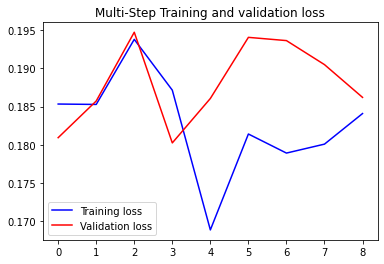

In [22]:
# Visualization Loss
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

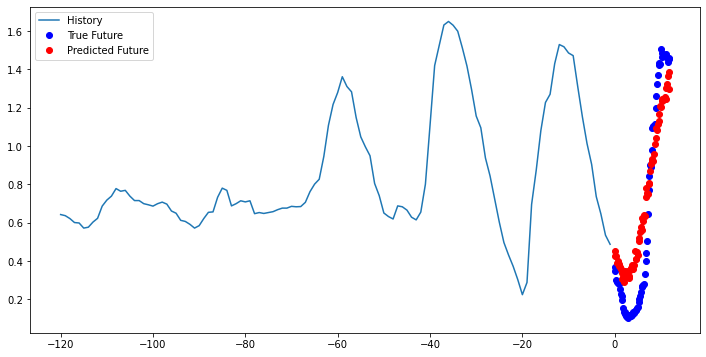

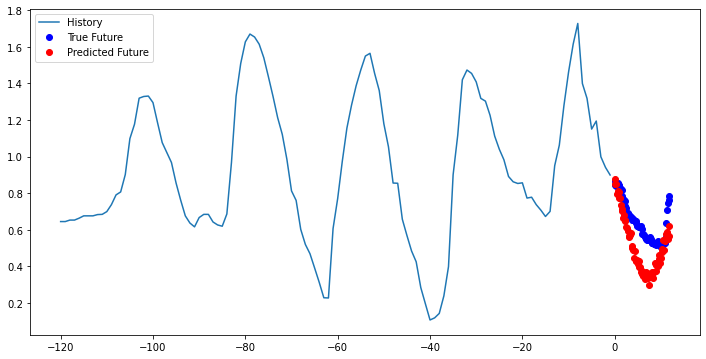

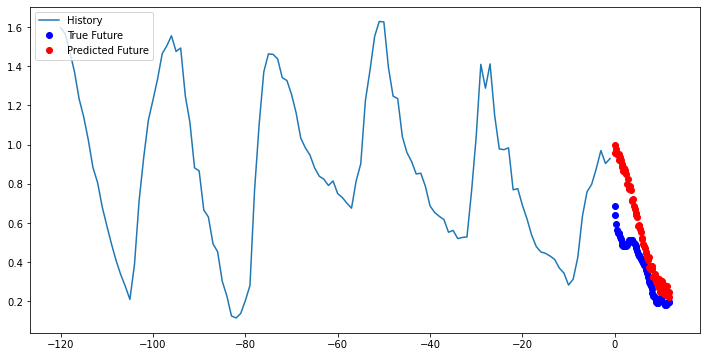

In [23]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])